In [1]:
# !pip install autoscraper

In [2]:
#from autoscraper import AutoScraper

In [1]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as urReq
import json
import re

In [2]:
link = "https://www.youtube.com/user/krishnaik06/videos"
#link = "https://www.youtube.com/c/Telusko/videos"
link

'https://www.youtube.com/user/krishnaik06/videos'

In [45]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

#driver =webdriver.Chrome(executable_path="D:\Softwares\Chrome Driver\chromedriver.exe")

In [61]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.youtube.com/user/{}/videos?view=0&sort=p&flow=grid'.format(link))
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
time.sleep(3)
content = driver.page_source.encode('utf-8').strip()
soup = BeautifulSoup(content,'html.parser')
titles = soup.find_all('a',id='video-title')
#print(titles)
title = []
for i in titles:
    title.append(i.text)

In [62]:
title

['AI VS ML VS DL VS Data Science',
 'How To Learn Data Science Smartly?',
 'Complete Road Map To Be Expert In Python- Follow My Way',
 'OTT Platform For Education OneNeuron- Education As A Service',
 "Negotiating Salaries With HR for Any Job Is An Art. Learn IT Before It's Late 😭😭😭😭",
 'Complete Road Map To Prepare NLP-Follow This Video-You Will Able to Crack Any DS Interviews🔥🔥',
 'Live- Implementation of End To End Kaggle Machine Learning Project With Deployment',
 'How To Learn Data Science by Self Study and For Free',
 'Complete Roadmap For Becoming A Blockchain Developer In 2022',
 'Learning Data Science In 2022- Step By Step Plan',
 '6 Certifications In Data Science But No Jobs- Sharing A True Story-Focus More On Data Science Jobs',
 'RoadMap With Minimal Skills To Become Data Analyst In 2022',
 'Tutorial 32- All About P Value,T test,Chi Square Test, Anova Test  and When  to Use What?',
 'My Salary As A Data Scientist From Starting Of My Career',
 'Live Day 1- Introduction To Mac

In [67]:
t = soup.find_all('a',id='video-title')
t[0].text

'AI VS ML VS DL VS Data Science'

## Witcher Series Scraping 

In [21]:
import pandas as pd 
from selenium import webdriver 
from webdriver_manager.chrome import ChromeDriverManager 
import time 

In [22]:
driver = webdriver.Chrome(ChromeDriverManager().install())
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(page_url)

C:\Users\HP\AppData\Local\Temp\ipykernel_9588\3226908433.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [23]:
from selenium.webdriver.common.by import By
book_category = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

books = []
for i in book_category:
    book_url = i.get_attribute('href')
    book_name = i.text 
    books.append({'Book_Name':book_name,'URL':book_url})

In [24]:
books

[{'Book_Name': 'Category:Baptism of Fire characters',
  'URL': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'Book_Name': 'Category:Blood of Elves characters',
  'URL': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'Book_Name': "Godamba Thaess'en",
  'URL': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'Book_Name': 'Category:Season of Storms characters',
  'URL': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'Book_Name': 'Category:Something Ends, Something Begins characters',
  'URL': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'Book_Name': 'Category:Sword of Destiny characters',
  'URL': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'Book_Name': 'Category:Szpony i kły characters',
  'URL': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'Book_Name': 'Category:Tales from the world of The W

In [25]:
character_list =[]
for i in books:
    driver.get(i['URL'])
    char_elems = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

    for j in char_elems:
        character_list.append({'Book':i['Book_Name'],'Character':j.text})

In [26]:
driver.close()

In [31]:
df = pd.DataFrame(character_list)
df 

,Book,Character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1270,Category:Time of Contempt characters,Yanna of Murivel
1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,Category:Time of Contempt characters,Yiolenta Suarez


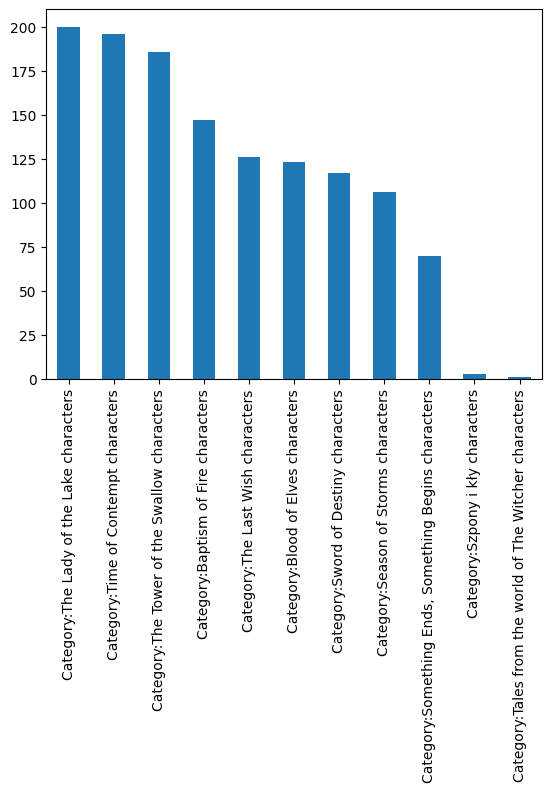

In [37]:
import matplotlib.pyplot as plt
df['Book'].value_counts().plot(kind='bar')
plt.show()

In [38]:
df['Book'].value_counts()

Category:The Lady of the Lake characters                   200
Category:Time of Contempt characters                       196
Category:The Tower of the Swallow characters               186
Category:Baptism of Fire characters                        147
Category:The Last Wish characters                          126
Category:Blood of Elves characters                         123
Category:Sword of Destiny characters                       117
Category:Season of Storms characters                       106
Category:Something Ends, Something Begins characters        70
Category:Szpony i kły characters                             3
Category:Tales from the world of The Witcher characters      1
Name: Book, dtype: int64